In [1]:
import os
import glob
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, LeakyReLU
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
import tensorflow as tf
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [13]:
files='F:\\Exprement\\saturn\\time_series\\star_pro\\datas'
scaler = StandardScaler()

for a in os.listdir(files):
    name, ext = os.path.splitext(a)
    if ext == ".csv":
        file=pd.read_csv(os.path.join(files,a))
        file=file.set_index('Time')
        file=file.drop(['RSI_Spot','MFI_MA','BBWP_MA','PMAR_MA'],axis=1)
        file=file.replace({' -   ': '0', '_': '0', '-': '0', ',': ''}, regex=True)
        file=file.iloc[:,1:43]
        test_file = file.iloc[:,1:]
        testX = scaler.fit_transform(file)
        testY = testX [:,33:34]

In [22]:
win_length=30
batch_size=5

test_generator=TimeseriesGenerator(testX,testY,length=win_length,sampling_rate=1,batch_size=batch_size)

test_generator[0],testX.shape

((array([[[ 2.14900028,  2.14974694,  2.19282028, ...,  0.31250049,
            2.52062051,  1.82348333],
          [ 2.00213298,  1.76171528,  1.84283741, ..., -0.47876834,
            2.26310832,  1.17632063],
          [ 1.75979735,  1.82934502,  1.7475758 , ..., -0.92396151,
            2.02209747,  0.58977776],
          ...,
          [-0.70419047, -0.60571381, -0.57013182, ...,  1.51794783,
           -0.53374231,  0.98809717],
          [-0.67550123, -0.59045687, -0.63225896, ...,  1.64191403,
           -0.40069333,  1.22234369],
          [-0.89884914, -0.83849496, -0.93523595, ...,  1.1341143 ,
           -0.36654315,  1.27447508]],
  
         [[ 2.00213298,  1.76171528,  1.84283741, ..., -0.47876834,
            2.26310832,  1.17632063],
          [ 1.75979735,  1.82934502,  1.7475758 , ..., -0.92396151,
            2.02209747,  0.58977776],
          [ 1.59265616,  1.69361068,  1.64719419, ..., -1.00494838,
            1.79326138,  0.04946567],
          ...,
          [-

1/1 [==============================] - 0s 27ms/step
rms = 8.757743504258777


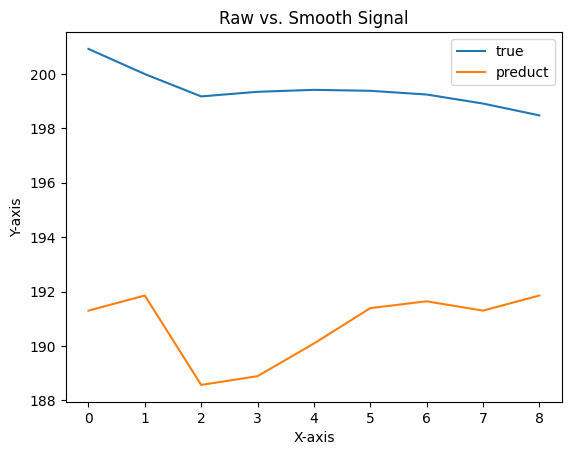

In [20]:
from tensorflow.keras.models import load_model
model_2=load_model('weights\\star_pro_weights_4.1.h5', compile=False)

pre_df=[]
tru_df=[]

for i in range(len(test_generator)):
    tt=model_2.predict(test_generator[i][0])
    prediction_copies = np.repeat(tt, testX.shape[1], axis=-1)
    y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]
    pre_df.extend(y_pred_future)
    
    ttt=test_generator[i][1]
    true_copies = np.repeat(ttt, testX.shape[1], axis=-1)
    y_true_future = scaler.inverse_transform(true_copies)[:,0]
    tru_df.extend(y_true_future)

from sklearn.metrics import mean_squared_error
from math import sqrt
print('rms =', sqrt(mean_squared_error(pre_df, tru_df)))

plt.plot(pre_df, label='true')
plt.plot(tru_df, label='preduct')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Raw vs. Smooth Signal')
plt.legend()
plt.show()

1/1 [==============================] - 0s 48ms/step
rms = 5.8518991289697535


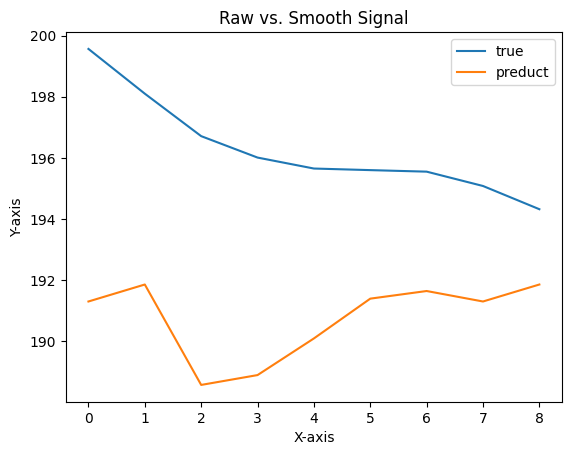

In [21]:
from tensorflow.keras.models import load_model
model_2=load_model('weights\\star_pro_weights_5.1.h5', compile=False)

pre_df=[]
tru_df=[]

for i in range(len(test_generator)):
    tt=model_2.predict(test_generator[i][0])
    prediction_copies = np.repeat(tt, testX.shape[1], axis=-1)
    y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]
    pre_df.extend(y_pred_future)
    
    ttt=test_generator[i][1]
    true_copies = np.repeat(ttt, testX.shape[1], axis=-1)
    y_true_future = scaler.inverse_transform(true_copies)[:,0]
    tru_df.extend(y_true_future)

from sklearn.metrics import mean_squared_error
from math import sqrt
print('rms =', sqrt(mean_squared_error(pre_df, tru_df)))

plt.plot(pre_df, label='true')
plt.plot(tru_df, label='preduct')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Raw vs. Smooth Signal')
plt.legend()
plt.show()